In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import real spectrum

We select as planet WASP-96b and upload its spectrum, visualize it and plot it.

In [2]:
NAMES = ['wavelength', 'Bandwidth', 'TranDep', 'sigma_p', 'sigma_m']
df = pd.read_csv('../WASP_96_b_3.11667_5310_1.tbl', comment='\\', delim_whitespace=True, header=4, usecols=[0,1,2,3,4], names =NAMES)

df['TranDep'] = df['TranDep']*0.01
df['sigma_p'] = df['sigma_p']*0.01
df['sigma_m'] = df['sigma_m']*0.01
df = df.drop(columns='Bandwidth')

df.to_csv('WASP-96b_spectrum_assignment3_taskB.dat')

df

/tmp/ipykernel_548130/3487472196.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('../WASP_96_b_3.11667_5310_1.tbl', comment='\\', delim_whitespace=True, header=4, usecols=[0,1,2,3,4], names =NAMES)


,wavelength,TranDep,sigma_p,sigma_m
0,0.60044,0.014123,0.001094,-0.001094
1,0.60085,0.015497,0.001291,-0.001291
2,0.60126,0.012824,0.001278,-0.001278
3,0.60167,0.015329,0.001018,-0.001018
4,0.60208,0.014584,0.001236,-0.001236
...,...,...,...,...
2599,2.82452,0.014725,0.001351,-0.001351
2600,2.82553,0.017407,0.001445,-0.001445
2601,2.82654,0.014098,0.001386,-0.001386
2602,2.82755,0.015610,0.001293,-0.001293


Text(0, 0.5, 'Transit Depth (%)')

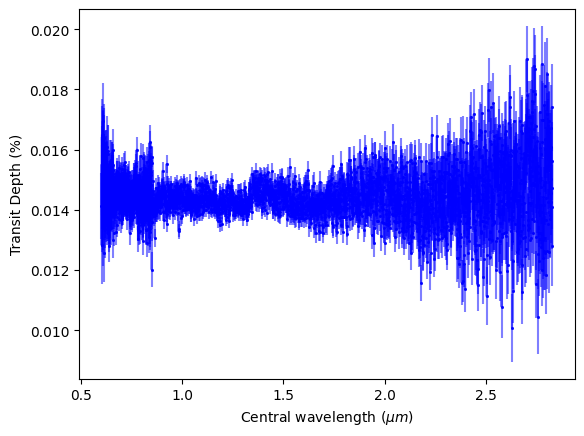

In [3]:
yerr = np.array([df['sigma_p'], -1*df['sigma_m']])
plt.errorbar(df['wavelength'], df['TranDep'], yerr=yerr, color='blue', alpha=0.5)
plt.plot(df['wavelength'], df['TranDep'], color='blue', marker='s', markersize=1, linestyle='')
plt.xlabel(r'Central wavelength ($\mu m$)')
plt.ylabel('Transit Depth (%)')

To make the plot clearer, the data have been pruned using the rolling method of Pandas, which performs a rolling window average (10 points each, than moves to another group of ten).

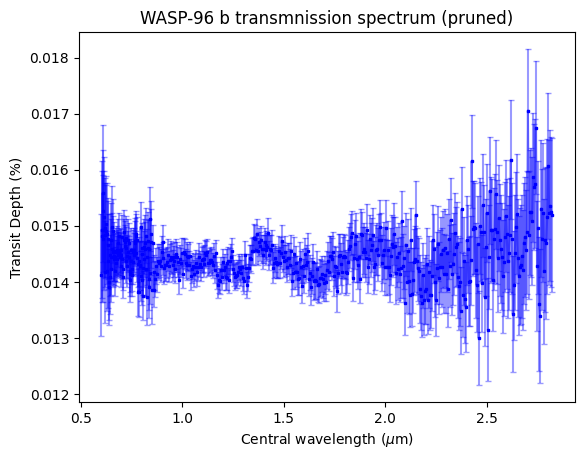

In [4]:
df_rol = df.rolling(5, step=5, min_periods=1).mean()
plt.errorbar(df_rol['wavelength'], df_rol['TranDep'], df_rol['sigma_p'], capsize=2, alpha=0.4, color='blue')
plt.plot(df_rol['wavelength'], df_rol['TranDep'], color='blue', linestyle='', marker='s', markersize=2)
plt.xlabel(r'Central wavelength ($\mu$m)')
plt.ylabel('Transit Depth (%)')
plt.title('WASP-96 b transmnission spectrum (pruned)')
plt.savefig('WASP-96b_spectrum_assignment3_taskB.png')

We save the obtained pruned spectrum to a file.

In [5]:
with open('WASP-96b_pruned_spectrum.dat', 'w') as f:
    f.write('# Wavelength, (Rp/Rs)^2, err')
    data_dt = df_rol[['wavelength', 'TranDep', 'sigma_p']]
    data_dt.to_csv(f, sep='\t', header=False, index=False)